In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/employee-satisfaction-index-dataset/Employee Satisfaction Index.csv


In [3]:
#more imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [4]:
path = Path('/kaggle/input/employee-satisfaction-index-dataset/Employee Satisfaction Index.csv')
df = pd.read_csv(path)

emp_id - Unique ID

age - Age

Dept - Department

location - Employee location

education - Employee's education status

recruitment_type - Mode of recruitment

job_level - 1 to 5. The job level of the employee. 1 being the least and 5 being the highest position

rating - 1 to 5. The previous year rating of the employee. 1 being the least and 5 being the highest position

onsite - Has the employee ever went to an onsite location? 0 and 1

awards - No. of awards

certifications - Is the employee certified?

salary - Net Salary

satisfied - Is the employee satisfied with his job?

checking for the head() and null values first

In [5]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [6]:
df.isnull().sum(),df.isna().sum()

(Unnamed: 0          0
 emp_id              0
 age                 0
 Dept                0
 location            0
 education           0
 recruitment_type    0
 job_level           0
 rating              0
 onsite              0
 awards              0
 certifications      0
 salary              0
 satisfied           0
 dtype: int64,
 Unnamed: 0          0
 emp_id              0
 age                 0
 Dept                0
 location            0
 education           0
 recruitment_type    0
 job_level           0
 rating              0
 onsite              0
 awards              0
 certifications      0
 salary              0
 satisfied           0
 dtype: int64)

dropping unnecessary columns

In [7]:
df.drop(['Unnamed: 0','emp_id'],axis=1,inplace=True)

In [8]:
df.Dept.unique(),df.location.unique(),df.recruitment_type.unique()

(array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
       dtype=object),
 array(['Suburb', 'City'], dtype=object),
 array(['Referral', 'Walk-in', 'On-Campus', 'Recruitment Agency'],
       dtype=object))

let's get visual representation of the data

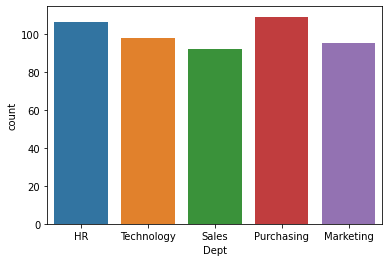

In [9]:
sns.countplot(x = 'Dept',data = df)

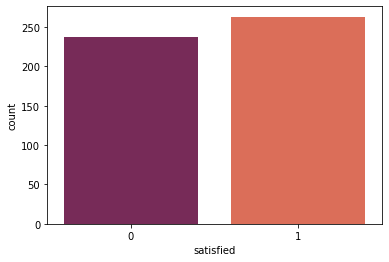

In [10]:
sns.countplot(x = 'satisfied',data = df,palette='rocket')

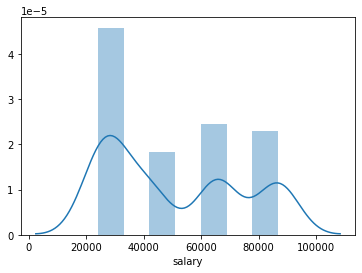

In [11]:
sns.distplot(df['salary'])

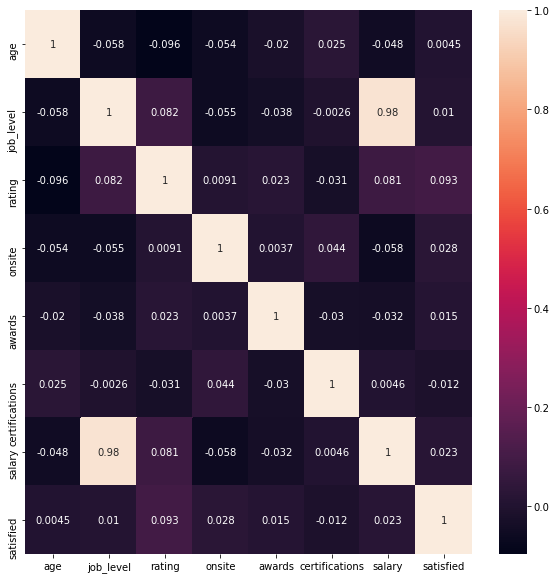

In [12]:
correlation = df.corr()
plt.figure(1,figsize=(10,10))
sns.heatmap(correlation,annot=True)

that's nice destribution right here.

Converting columns to categorical datatype and i won't use one hot encoding for a reason.

In [13]:
df.Dept.unique(),df.location.unique(),df.recruitment_type.unique(),df.education.unique()

(array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
       dtype=object),
 array(['Suburb', 'City'], dtype=object),
 array(['Referral', 'Walk-in', 'On-Campus', 'Recruitment Agency'],
       dtype=object),
 array(['PG', 'UG'], dtype=object))

In [14]:
df.location = df.location.astype('category')
df.Dept = df.Dept.astype('category')
df.recruitment_type =  df.recruitment_type.astype('category')
df.education = df.education.astype('category')

In [15]:
location_d = dict(enumerate(df.location.cat.categories))
Dept_d = dict(enumerate(df.Dept.cat.categories))
recruitment_type_d = dict(enumerate(df.recruitment_type.cat.categories))
education_d = dict(enumerate(df.education.cat.categories))

In [16]:
df.location = df.location.cat.codes
df.Dept = df.Dept.cat.codes
df.recruitment_type = df.recruitment_type.cat.codes
df.education = df.education.cat.codes

train\test split

In [17]:
X = df.drop(['satisfied'],axis=1)
y = df.satisfied

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

**Decision Tree**

In [19]:
DTmodel = DecisionTreeClassifier().fit(X_train,y_train)

In [20]:
DTmodel.score(X_test,y_test)

0.56

DT gives decent visualization how data splits. 
With random forest we'll get way more variations , but it's usefull to have the initial one.

[Text(418.5, 733.86, 'X[1] <= 1.5\ngini = 0.499\nsamples = 400\nvalue = [192, 208]'),
 Text(209.25, 570.78, 'X[8] <= 7.5\ngini = 0.497\nsamples = 157\nvalue = [85, 72]'),
 Text(104.625, 407.70000000000005, 'X[0] <= 38.5\ngini = 0.5\nsamples = 123\nvalue = [60, 63]'),
 Text(52.3125, 244.62, 'X[0] <= 27.5\ngini = 0.484\nsamples = 61\nvalue = [25, 36]'),
 Text(26.15625, 81.54000000000008, '\n  (...)  \n'),
 Text(78.46875, 81.54000000000008, '\n  (...)  \n'),
 Text(156.9375, 244.62, 'X[3] <= 0.5\ngini = 0.492\nsamples = 62\nvalue = [35, 27]'),
 Text(130.78125, 81.54000000000008, '\n  (...)  \n'),
 Text(183.09375, 81.54000000000008, '\n  (...)  \n'),
 Text(313.875, 407.70000000000005, 'X[4] <= 2.5\ngini = 0.389\nsamples = 34\nvalue = [25, 9]'),
 Text(261.5625, 244.62, 'X[8] <= 8.5\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(235.40625, 81.54000000000008, '\n  (...)  \n'),
 Text(287.71875, 81.54000000000008, '\n  (...)  \n'),
 Text(366.1875, 244.62, 'X[10] <= 47760.0\ngini = 0.408\n

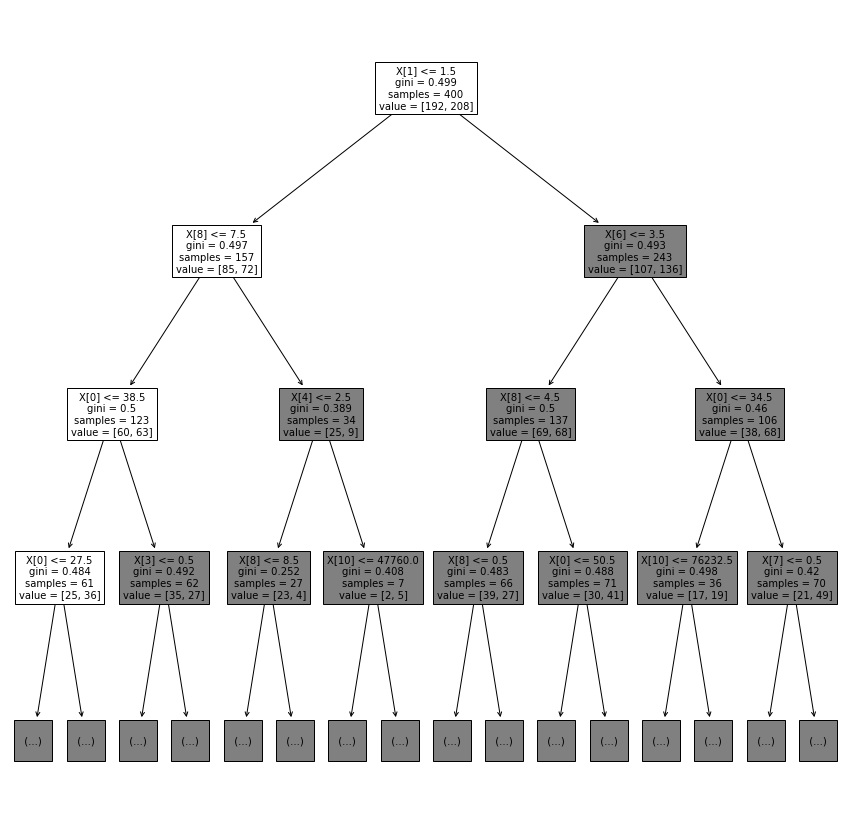

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(DTmodel,fontsize=10,max_depth=3)

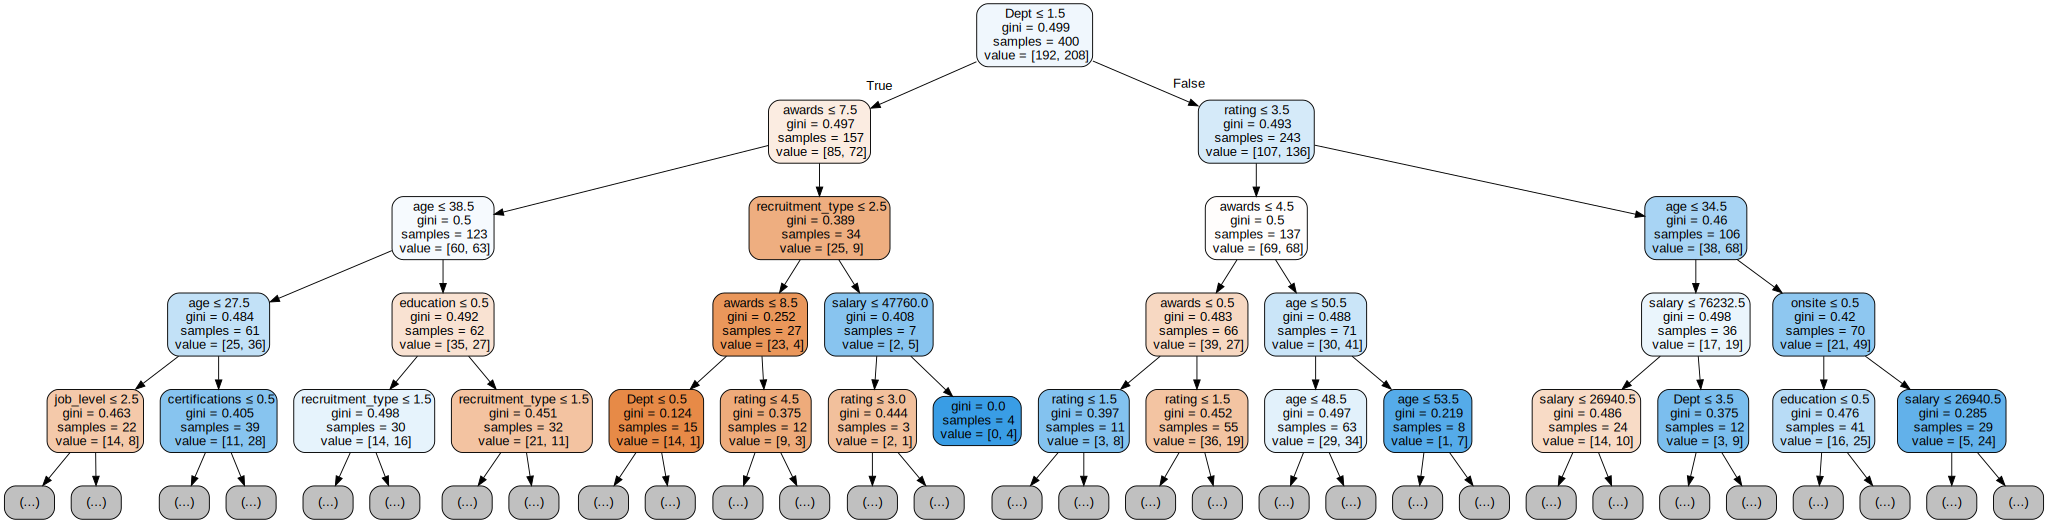

In [22]:
treedata = tree.export_graphviz(DTmodel,out_file=None,feature_names=X_train.columns,filled=True,rounded=True,special_characters=True,max_depth=4)
graph = graphviz.Source(treedata)
graph

**Random Forest Classifier**

In [23]:
RFmodel = RandomForestClassifier().fit(X_train,y_train)

In [24]:
RFmodel.score(X_test,y_test)

0.51

Slightly better improvement. Score is low for basic binary classification, probably due to even distribution of generated satisfaction points. It would be different for sure with real-world data.

Anyway, let's finish notebook with confusion matrix

In [25]:
test_pred = RFmodel.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[21, 24],
       [25, 30]])

and feature importance

([<matplotlib.axis.YTick at 0x7f75ac9c9e10>,
 [Text(0, 0, 'Dept'),
  Text(0, 0, 'location'),
  Text(0, 0, 'education'),
  Text(0, 0, 'recruitment_type'),
  Text(0, 0, 'job_level'),
  Text(0, 0, 'rating'),
  Text(0, 0, 'onsite'),
  Text(0, 0, 'awards'),
  Text(0, 0, 'certifications'),
  Text(0, 0, 'salary'),
  Text(0, 0, 'satisfied')])

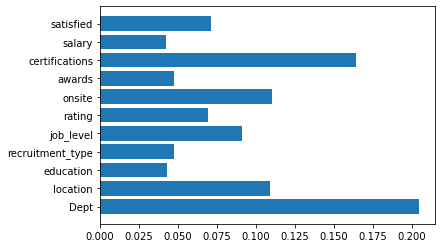

In [26]:
n_features = X.shape[1]
plt.barh(range(n_features),RFmodel.feature_importances_)
plt.yticks(np.arange(n_features),df.columns[1:])